### Business Problem : Predicit the deaths in Covid 19 cases based on data provided.
#### Death: Binary     Model: Classification

In [138]:
# First we will import the all the necessary libraries.

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
os.chdir("D:\Imarticus\ML\Covid 19")

In [3]:
os.listdir()

['Covid.csv', 'covid19_sample.csv', 'data_dictionary_covid_cases_public.xlsx']

In [142]:
df=pd.read_csv("covid19_sample.csv")

In [143]:
df.head()

,Unnamed: 0,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,3517780,2020/07/22,NaN,NaN,Laboratory-confirmed case,Female,70 - 79 Years,"White, Non-Hispanic",Yes,Missing,Yes,Missing
1,3679793,2020/08/07,2020/08/04,NaN,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Yes,Unknown,Yes,Missing
2,3331587,2020/03/31,NaN,NaN,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Yes,No,Yes,Yes
3,3680266,2020/08/11,2020/08/05,NaN,Laboratory-confirmed case,Female,80+ Years,"Black, Non-Hispanic",Yes,Unknown,Yes,Yes
4,6264234,2020/04/18,NaN,NaN,Probable Case,Female,50 - 59 Years,"Asian, Non-Hispanic",Unknown,Unknown,Yes,Unknown


In [144]:
df.shape

(184155, 12)

* There are 184155 records/rows and 12 columns in the given data.

In [145]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184155 entries, 0 to 184154
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   cdc_report_dt                  184155 non-null  object
 1   pos_spec_dt                    67144 non-null   object
 2   onset_dt                       118445 non-null  object
 3   current_status                 184155 non-null  object
 4   sex                            184154 non-null  object
 5   age_group                      184151 non-null  object
 6   Race and ethnicity (combined)  184154 non-null  object
 7   hosp_yn                        184155 non-null  object
 8   icu_yn                         184155 non-null  object
 9   death_yn                       184155 non-null  object
 10  medcond_yn                     184155 non-null  object
dtypes: object(11)
memory usage: 15.5+ MB


* All the variables are objective.
* There are 4 columns that have missing values.

### EDA

In [147]:
df.describe().T

,count,unique,top,freq
cdc_report_dt,184155,287,2020/06/10,8553
pos_spec_dt,67144,278,2020/11/09,834
onset_dt,118445,314,2020/11/03,813
current_status,184155,2,Laboratory-confirmed case,173359
sex,184154,5,Female,92108
age_group,184151,10,80+ Years,37917
Race and ethnicity (combined),184154,9,"White, Non-Hispanic",75938
hosp_yn,184155,4,No,91217
icu_yn,184155,4,Missing,103731
death_yn,184155,2,No,110724


In [148]:
df['medcond_yn'].value_counts(dropna=False)

Missing    101496
Yes         42408
Unknown     21830
No          18421
Name: medcond_yn, dtype: int64

In [149]:
df['medcond_yn']=df['medcond_yn'].replace(['Missing'],'Unknown')

In [150]:
df['death_yn'].value_counts(dropna=False)

No     110724
Yes     73431
Name: death_yn, dtype: int64

In [151]:
df['death_yn']=df['death_yn'].map({'Yes':1,'No':0})

In [152]:
df['icu_yn'].value_counts(dropna=False)

Missing    103731
Unknown     42300
No          27584
Yes         10540
Name: icu_yn, dtype: int64

In [153]:
df['icu_yn']=df['icu_yn'].replace(['Missing'],'Unknown')

In [154]:
df['hosp_yn'].value_counts(dropna=False)

No         91217
Yes        53384
Unknown    20043
Missing    19511
Name: hosp_yn, dtype: int64

In [155]:
df['hosp_yn']=df['hosp_yn'].replace(['Missing'],'Unknown')

In [156]:
df['Race and ethnicity (combined)'].value_counts(dropna=False)

White, Non-Hispanic                                     75938
Unknown                                                 39585
Hispanic/Latino                                         26330
Black, Non-Hispanic                                     22485
Multiple/Other, Non-Hispanic                             6902
Missing                                                  6789
Asian, Non-Hispanic                                      4581
American Indian/Alaska Native, Non-Hispanic              1100
Native Hawaiian/Other Pacific Islander, Non-Hispanic      444
NaN                                                         1
Name: Race and ethnicity (combined), dtype: int64

In [157]:
df.rename(columns={'Race and ethnicity (combined)': 'Race_enthnicity'},inplace=True)

In [158]:
df['Race_enthnicity']=df['Race_enthnicity'].replace(['Missing'],'Unknown')

In [159]:
df['Race_enthnicity']=df['Race_enthnicity'].fillna('Unknown')

In [160]:
df['age_group'].value_counts(dropna=False)

80+ Years        37917
70 - 79 Years    24085
60 - 69 Years    23112
20 - 29 Years    22170
50 - 59 Years    21916
30 - 39 Years    19374
40 - 49 Years    19255
10 - 19 Years    11770
0 - 9 Years       4413
Unknown            139
NaN                  4
Name: age_group, dtype: int64

In [161]:
df['age_group']=df['age_group'].map({'0 - 9 Years':'0 - 19 Years',
                                       '10 - 19 Years':'0 - 19 Years',
                                       '20 - 29 Years':'20 - 39 Years',
                                       '30 - 39 Years':'20 - 39 Years',
                                       '40 - 49 Years':'40 - 59 Years',
                                       '50 - 59 Years':'40 - 59 Years',
                                       '60 - 69 Years':'60+ Years',
                                       '70 - 79 Years':'60+ Years',
                                       '80+ Years':'60+ Years',
                                       'Unknown':'Unknown'})

In [162]:
df['age_group']=df['age_group'].fillna('Unknown')

In [163]:
df['sex'].value_counts(dropna=False)

Female     92108
Male       91269
Unknown      537
Missing      238
Other          2
NaN            1
Name: sex, dtype: int64

In [164]:
df['sex']=df['sex'].replace(['Missing','Other'],'Unknown')

In [165]:
df['sex']=df['sex'].fillna('Unknown')

In [166]:
df['current_status'].value_counts(dropna=False)

Laboratory-confirmed case    173359
Probable Case                 10796
Name: current_status, dtype: int64

In [167]:
df.drop(columns=['pos_spec_dt','onset_dt'],inplace=True)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184155 entries, 0 to 184154
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   cdc_report_dt    184155 non-null  object
 1   current_status   184155 non-null  object
 2   sex              184155 non-null  object
 3   age_group        184155 non-null  object
 4   Race_enthnicity  184155 non-null  object
 5   hosp_yn          184155 non-null  object
 6   icu_yn           184155 non-null  object
 7   death_yn         184155 non-null  int64 
 8   medcond_yn       184155 non-null  object
dtypes: int64(1), object(8)
memory usage: 12.6+ MB


In [169]:
def date_format(data, x:str):
    x_type=data[x].dtype
    if isinstance(x_type, pd.core.dtypes.dtypes.DatetimeTZDtype):
        x_type=np.datetime64
    if not np.issubdtype(x_type,np.datetime64):
        data[x]=pd.to_datetime(data[x], infer_datetime_format=True)

In [170]:
date_format(data=df,x='cdc_report_dt')

In [171]:
df['cdc_report_dt'].dtypes

dtype('<M8[ns]')

In [172]:
df['quarter']=df['cdc_report_dt'].dt.quarter   # df['quarter']=df['cdc_report_dt'].dt.to_period('Q')
df['month']=df['cdc_report_dt'].dt.month
df['day']=df['cdc_report_dt'].dt.day
df['day_of_week']=df['cdc_report_dt'].dt.dayofweek

In [211]:
df['month'].value_counts()    # there is no record of december in this data

6     27973
10    25274
11    24463
7     22130
4     21744
8     20218
9     19368
5     17499
3      5446
2        31
1         9
Name: month, dtype: int64

In [173]:
def mnth_cat(x):
    if x<=10:
        return "starting_of_month"
    elif x>10 and x<=20:
        return "mid_of_month"
    else:
        return "end_of_month"

In [174]:
df['month_cat']=df['day'].apply(mnth_cat)

In [175]:
df['day_of_week'].value_counts()

2    37372
1    29241
0    27831
3    24210
6    22150
4    21904
5    21447
Name: day_of_week, dtype: int64

In [176]:
def day_cat(x):
    if x <= 4:
        return "weekday"
    else:
        return "weekend"

In [177]:
df['day_cat']=df['day_of_week'].apply(lambda a : day_cat(a))

In [178]:
df['day_cat'].value_counts()

weekday    140558
weekend     43597
Name: day_cat, dtype: int64

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184155 entries, 0 to 184154
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   cdc_report_dt    184155 non-null  datetime64[ns]
 1   current_status   184155 non-null  object        
 2   sex              184155 non-null  object        
 3   age_group        184155 non-null  object        
 4   Race_enthnicity  184155 non-null  object        
 5   hosp_yn          184155 non-null  object        
 6   icu_yn           184155 non-null  object        
 7   death_yn         184155 non-null  int64         
 8   medcond_yn       184155 non-null  object        
 9   quarter          184155 non-null  int64         
 10  month            184155 non-null  int64         
 11  day              184155 non-null  int64         
 12  day_of_week      184155 non-null  int64         
 13  month_cat        184155 non-null  object        
 14  day_cat          184

In [180]:
def univariate_cat(data,x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    
    f1=pd.DataFrame(data[x].value_counts(dropna=False))
    f1.rename(columns={x:"Count"},inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:"Percentage"},inplace=True)
    f2["Percentage"]=(f2["Percentage"]*100).round(2).astype(str)+" %"
    ff=pd.concat([f1,f2],axis=1)
    
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique category : {unique_cnt}\n")
    print(f"Unique categories : \n{unique_cat}")
    print(f"Value count and % : \n{ff}")

In [181]:
univariate_cat(df,'death_yn')

Total missing values : 0

Total count of unique category : 2

Unique categories : 
[1, 0]
Value count and % : 
    Count Percentage
0  110724    60.13 %
1   73431    39.87 %


In [182]:
univariate_cat(df,'icu_yn')

Total missing values : 0

Total count of unique category : 3

Unique categories : 
['Unknown', 'No', 'Yes']
Value count and % : 
          Count Percentage
Unknown  146031     79.3 %
No        27584    14.98 %
Yes       10540     5.72 %


<AxesSubplot:xlabel='icu_yn', ylabel='count'>

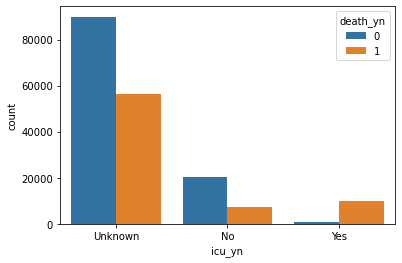

In [185]:
sns.countplot(data=df,x='icu_yn',hue='death_yn')

* People who were in icu have more deaths as compared to the people that were not.

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184155 entries, 0 to 184154
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   cdc_report_dt    184155 non-null  datetime64[ns]
 1   current_status   184155 non-null  object        
 2   sex              184155 non-null  object        
 3   age_group        184155 non-null  object        
 4   Race_enthnicity  184155 non-null  object        
 5   hosp_yn          184155 non-null  object        
 6   icu_yn           184155 non-null  object        
 7   death_yn         184155 non-null  int64         
 8   medcond_yn       184155 non-null  object        
 9   quarter          184155 non-null  int64         
 10  month            184155 non-null  int64         
 11  day              184155 non-null  int64         
 12  day_of_week      184155 non-null  int64         
 13  month_cat        184155 non-null  object        
 14  day_cat          184

<AxesSubplot:xlabel='death_yn', ylabel='count'>

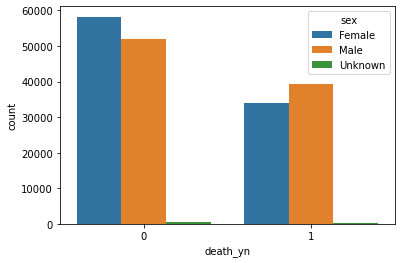

In [200]:
sns.countplot(data=df,hue='sex',x='death_yn')

* Males have more death than females

<AxesSubplot:xlabel='death_yn', ylabel='count'>

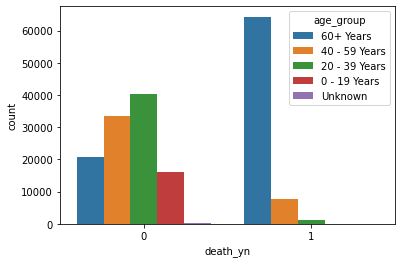

In [203]:
sns.countplot(data=df,hue='age_group',x='death_yn')

<AxesSubplot:xlabel='age_group', ylabel='count'>

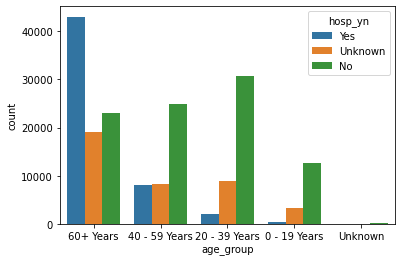

In [207]:
sns.countplot(data=df,hue='hosp_yn',x='age_group')

* People of age 60 and above have more chance of death.

<AxesSubplot:xlabel='death_yn', ylabel='count'>

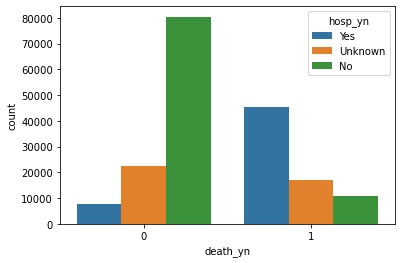

In [202]:
sns.countplot(data=df,hue='hosp_yn',x='death_yn')

* People who were admitted in hospital have more death rate than the people who were not.

<AxesSubplot:xlabel='death_yn', ylabel='count'>

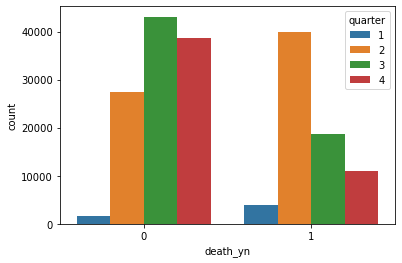

In [205]:
sns.countplot(data=df,hue='quarter',x='death_yn')

* Death rate in second quarter is more.

<AxesSubplot:xlabel='death_yn', ylabel='count'>

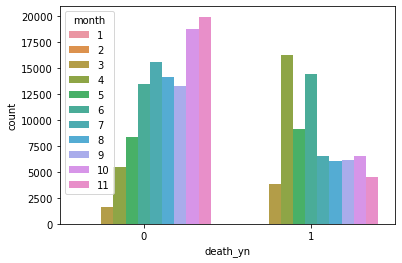

In [209]:
sns.countplot(data=df,hue='month',x='death_yn')

<AxesSubplot:xlabel='month', ylabel='count'>

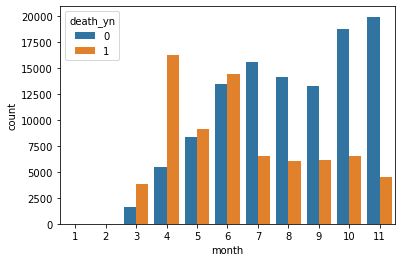

In [220]:
sns.countplot(data=df,x='month',hue='death_yn')

* There are more deaths in April followed by June and less deaths in march.

In [46]:
df.drop(columns=['cdc_report_dt'],inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184155 entries, 0 to 184154
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   current_status   184155 non-null  object
 1   sex              184155 non-null  object
 2   age_group        184155 non-null  object
 3   Race_enthnicity  184155 non-null  object
 4   hosp_yn          184155 non-null  object
 5   icu_yn           184155 non-null  object
 6   death_yn         184155 non-null  int64 
 7   medcond_yn       184155 non-null  object
 8   quarter          184155 non-null  int64 
 9   month            184155 non-null  int64 
 10  day              184155 non-null  int64 
 11  day_of_week      184155 non-null  int64 
 12  month_cat        184155 non-null  object
 13  day_cat          184155 non-null  object
dtypes: int64(5), object(9)
memory usage: 19.7+ MB


### Missing Value Treatment

In [48]:
df.isnull().sum()

current_status     0
sex                0
age_group          0
Race_enthnicity    0
hosp_yn            0
icu_yn             0
death_yn           0
medcond_yn         0
quarter            0
month              0
day                0
day_of_week        0
month_cat          0
day_cat            0
dtype: int64

* There is no missing value left now all has been replaced.

### Outliers

<AxesSubplot:xlabel='death_yn'>

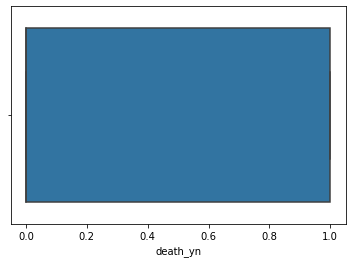

In [196]:
sns.boxplot(data=df,x='death_yn')

In [50]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
death_yn,184155.0,0.398746,0.489642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
quarter,184155.0,2.845505,0.854620,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
month,184155.0,7.447623,2.400948,1.0,3.0,3.0,4.0,4.0,4.0,6.0,7.0,10.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
day,184155.0,15.744965,8.478379,1.0,1.0,1.0,2.0,2.0,2.0,9.0,16.0,23.0,28.0,29.0,30.0,30.0,30.0,31.0,31.0
day_of_week,184155.0,2.738812,1.948675,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


* There are no outliers in this data

### Dummy Creation

In [51]:
df.dtypes[df.dtypes=='object']

current_status     object
sex                object
age_group          object
Race_enthnicity    object
hosp_yn            object
icu_yn             object
medcond_yn         object
month_cat          object
day_cat            object
dtype: object

In [52]:
df=pd.get_dummies(data=df, drop_first=True)

In [53]:
df.columns

Index(['death_yn', 'quarter', 'month', 'day', 'day_of_week',
       'current_status_Probable Case', 'sex_Male', 'sex_Unknown',
       'age_group_20 - 39 Years', 'age_group_40 - 59 Years',
       'age_group_60+ Years', 'age_group_Unknown',
       'Race_enthnicity_Asian, Non-Hispanic',
       'Race_enthnicity_Black, Non-Hispanic',
       'Race_enthnicity_Hispanic/Latino',
       'Race_enthnicity_Multiple/Other, Non-Hispanic',
       'Race_enthnicity_Native Hawaiian/Other Pacific Islander, Non-Hispanic',
       'Race_enthnicity_Unknown', 'Race_enthnicity_White, Non-Hispanic',
       'hosp_yn_Unknown', 'hosp_yn_Yes', 'icu_yn_Unknown', 'icu_yn_Yes',
       'medcond_yn_Unknown', 'medcond_yn_Yes', 'month_cat_mid_of_month',
       'month_cat_starting_of_month', 'day_cat_weekend'],
      dtype='object')

In [54]:
df.columns=df.columns.str.replace("[-, /]",'_')

C:\Users\ABHAY\AppData\Local\Temp\ipykernel_11000\4001130695.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns=df.columns.str.replace("[-, /]",'_')


In [55]:
df.columns

Index(['death_yn', 'quarter', 'month', 'day', 'day_of_week',
       'current_status_Probable_Case', 'sex_Male', 'sex_Unknown',
       'age_group_20___39_Years', 'age_group_40___59_Years',
       'age_group_60+_Years', 'age_group_Unknown',
       'Race_enthnicity_Asian__Non_Hispanic',
       'Race_enthnicity_Black__Non_Hispanic',
       'Race_enthnicity_Hispanic_Latino',
       'Race_enthnicity_Multiple_Other__Non_Hispanic',
       'Race_enthnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic',
       'Race_enthnicity_Unknown', 'Race_enthnicity_White__Non_Hispanic',
       'hosp_yn_Unknown', 'hosp_yn_Yes', 'icu_yn_Unknown', 'icu_yn_Yes',
       'medcond_yn_Unknown', 'medcond_yn_Yes', 'month_cat_mid_of_month',
       'month_cat_starting_of_month', 'day_cat_weekend'],
      dtype='object')

In [56]:
df.shape

(184155, 28)

### Multicolinearity

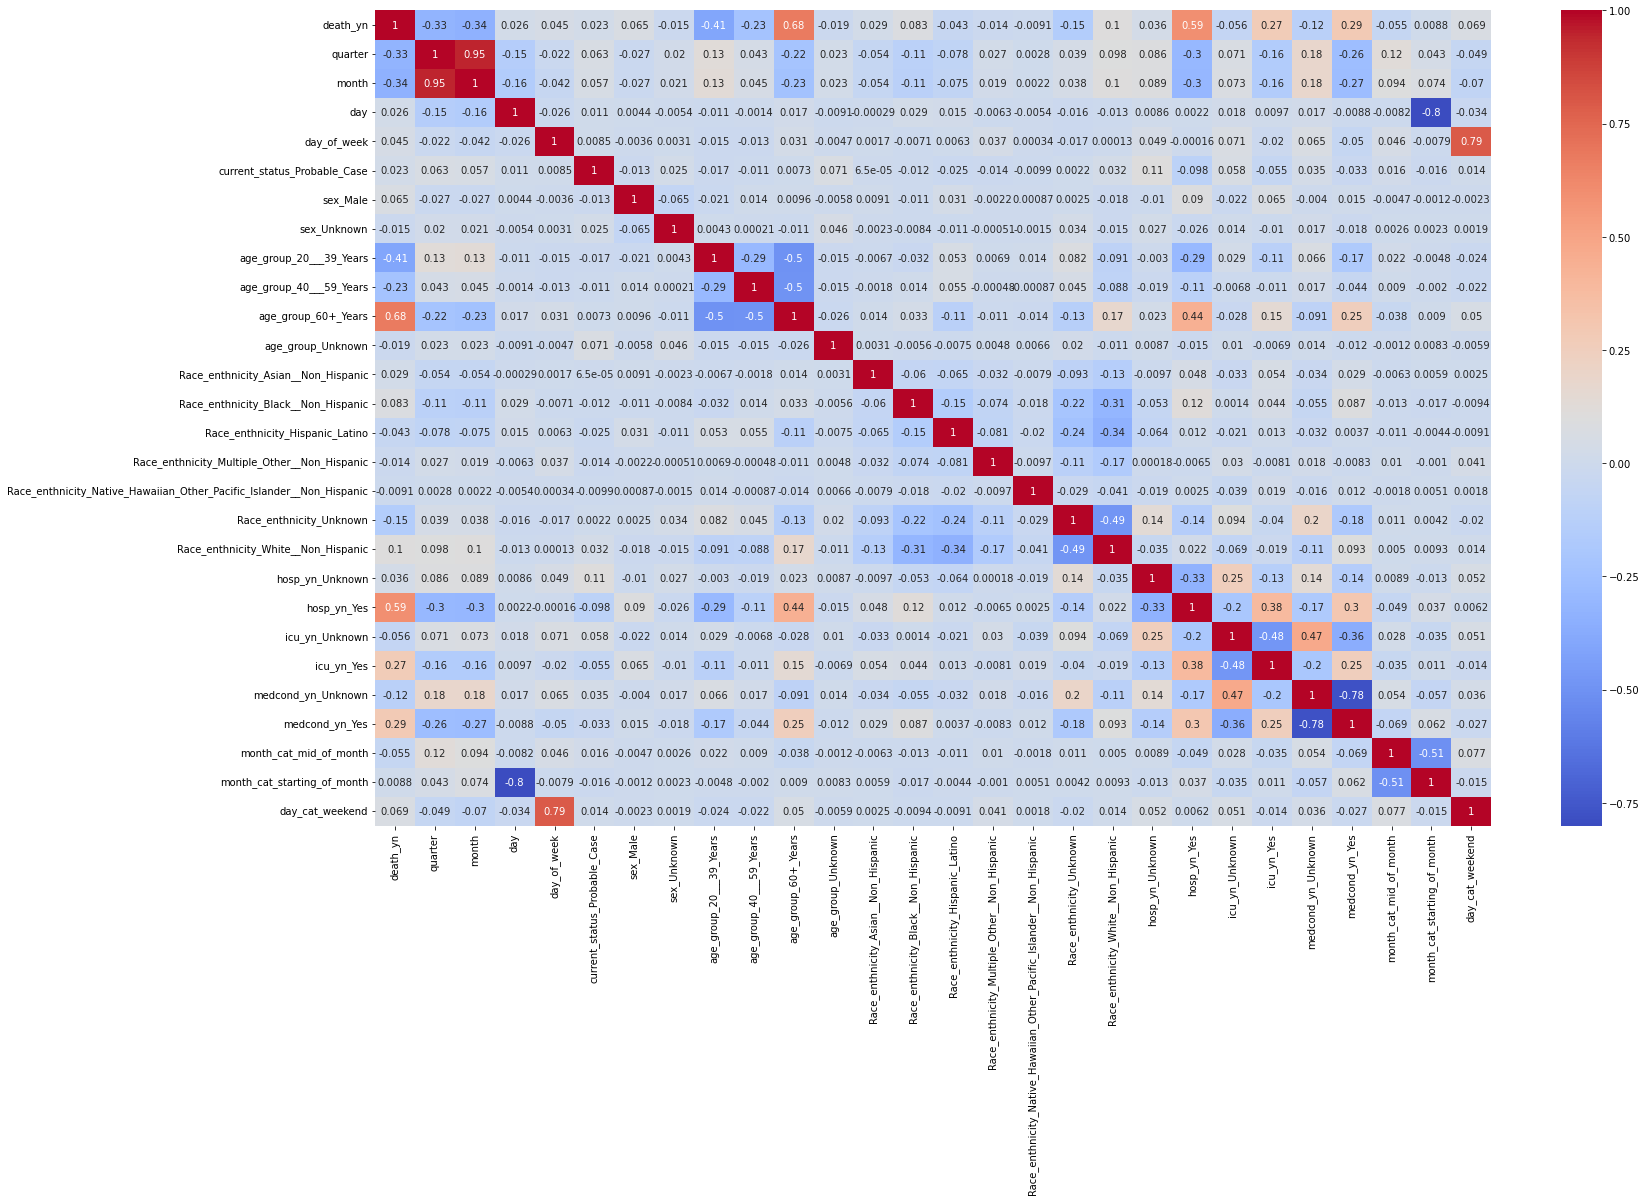

In [57]:
plt.figure(figsize=(25,15))
cr=df.corr()
sns.heatmap(data=cr, annot=True, cmap='coolwarm')
plt.show()

### Model Development

In [58]:
y=df['death_yn']
x=df.drop(columns=['death_yn'])

In [59]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.3,random_state=0)

In [60]:
logR=LogisticRegression(max_iter=1000)
logR.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [61]:
print('Train Score : ', logR.score(x_train,y_train))
print('Test Score : ', logR.score(x_test,y_test))

Train Score :  0.8858488224159866
Test Score :  0.8871974948866002


In [62]:
pred_train=logR.predict(x_train)
pred_test=logR.predict(x_test)

### Cofusion Matrix

In [63]:
conf_train=metrics.confusion_matrix(y_train,pred_train)

In [64]:
pd.DataFrame(conf_train, columns=['Pred_0_neg','Pred_1_pos'], index=['Act_0_neg','Act_1_pos'])

,Pred_0_neg,Pred_1_pos
Act_0_neg,69591,7683
Act_1_pos,7032,44602


In [65]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     77274
           1       0.85      0.86      0.86     51634

    accuracy                           0.89    128908
   macro avg       0.88      0.88      0.88    128908
weighted avg       0.89      0.89      0.89    128908



In [66]:
prob_train=pd.DataFrame(logR.predict_proba(x_train),columns=['prob_0','prob_1'])
prob_train

,prob_0,prob_1
0,0.931059,0.068941
1,0.036987,0.963013
2,0.787930,0.212070
3,0.028047,0.971953
4,0.221730,0.778270
...,...,...
128903,0.993644,0.006356
128904,0.572244,0.427756
128905,0.994293,0.005707
128906,0.780941,0.219059


### ROC and AUC

In [67]:
fpr, tpr, thresholds=metrics.roc_curve(y_train,pred_train)
roc_auc=metrics.auc(fpr,tpr)    # AUC : Area under the curve
roc_auc

0.882192623080674

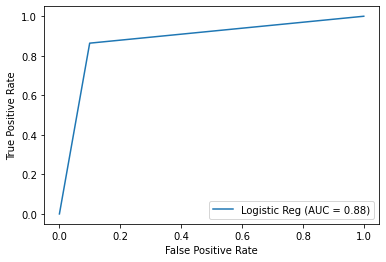

In [68]:
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc, estimator_name='Logistic Reg')
display.plot()
plt.show()

## Decision Tree

In [71]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [72]:
print('Train Accuracy :',round(dt.score(x_train,y_train),3))
print('Test Accuracy :',round(dt.score(x_test,y_test),3))

Train Accuracy : 0.935
Test Accuracy : 0.873


### Grid Search and Random Search

#### Gris Search : Parameter tuning

In [104]:
import time
tic=time.time()

params={
    'criterion': ['gini','entropy'],
    'max_depth': [9,11,13,15],
    'min_samples_split': [10,15,20,50,100,200,250],
    'min_samples_leaf': [5,10,15,20,50,80,100]}

dtg=DecisionTreeClassifier()

gd_search=GridSearchCV(estimator=dtg, param_grid=params, cv=10, n_jobs=-1, verbose=2)

gd_search.fit(x_train, y_train)

toc=time.time()
print('\n Total time taken :', toc-tic)

Fitting 10 folds for each of 392 candidates, totalling 3920 fits

 Total time taken : 1324.8259449005127


In [105]:
gd_search.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 15,
 'min_samples_split': 50}

In [106]:
gd_search.best_score_

0.8937769634867129

In [107]:
gd_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=15,
                       min_samples_split=50)

In [108]:
pd.DataFrame(gd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,2.439273,0.193926,0.026557,0.014059,gini,9,5,10,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.894810,...,0.893647,0.888527,0.891475,0.889147,0.891164,0.891544,0.894880,0.892559,0.002645,135
1,2.166947,0.068474,0.026557,0.007159,gini,9,5,15,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.894810,...,0.893957,0.888604,0.891707,0.889535,0.890932,0.891699,0.894725,0.892621,0.002555,120
2,2.218757,0.062444,0.024992,0.010364,gini,9,5,20,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.894733,...,0.894267,0.888527,0.891863,0.889535,0.890854,0.891621,0.894802,0.892660,0.002603,113
3,2.226439,0.090192,0.031283,0.017114,gini,9,5,50,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.894733,...,0.894112,0.888837,0.891940,0.889768,0.891242,0.891854,0.895423,0.892854,0.002510,75
4,2.783159,0.292436,0.056288,0.023652,gini,9,5,100,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.894965,...,0.893647,0.889303,0.892561,0.890078,0.891242,0.891466,0.895268,0.892908,0.002347,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,2.639345,0.091203,0.024994,0.007653,entropy,15,100,20,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.895353,...,0.892949,0.889147,0.891164,0.888760,0.890389,0.891234,0.893483,0.892396,0.002650,208
388,2.629673,0.150720,0.023422,0.010488,entropy,15,100,50,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.895353,...,0.892949,0.889147,0.891164,0.888760,0.890389,0.891234,0.893483,0.892396,0.002650,208
389,2.683533,0.068059,0.021870,0.007653,entropy,15,100,100,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.895353,...,0.892949,0.889147,0.891164,0.888760,0.890389,0.891234,0.893483,0.892396,0.002650,208
390,2.740281,0.289239,0.029681,0.012976,entropy,15,100,200,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.895353,...,0.892949,0.889147,0.891164,0.888760,0.890389,0.891234,0.893483,0.892396,0.002650,208


In [109]:
dt_f=DecisionTreeClassifier(criterion='entropy',max_depth=11, min_samples_leaf=15, min_samples_split=50)
dt_f.fit(x_train,y_train)

print('Train Accuracy : '+str(round(dt_f.score(x_train,y_train),3)*100)+str(' %'))
print('Test Accuracy : '+str(round(dt_f.score(x_test,y_test),3)*100)+str(' %'))

Train Accuracy : 89.8 %
Test Accuracy : 89.3 %


### Feature Importance

In [110]:
dt_f.feature_importances_

array([1.41636280e-02, 3.33086593e-02, 1.67697466e-02, 7.77359204e-03,
       6.38399556e-03, 3.75978718e-03, 6.19816964e-05, 7.49224981e-04,
       1.83173209e-02, 5.73448495e-01, 0.00000000e+00, 6.72147046e-05,
       1.06588709e-03, 1.70541983e-03, 1.17458739e-03, 0.00000000e+00,
       7.11585164e-03, 5.94060624e-03, 5.23828440e-02, 2.20160905e-01,
       7.79537071e-03, 9.99648325e-03, 6.98286724e-03, 7.48777154e-03,
       5.50751575e-04, 1.99070580e-03, 8.46302819e-04])

In [111]:
feat_imp=pd.DataFrame({'Variable': x_train.columns, 'Imp': dt_f.feature_importances_}).sort_values(by='Imp',ascending=False)
feat_imp

,Variable,Imp
9,age_group_60+_Years,0.573448
19,hosp_yn_Yes,0.220161
18,hosp_yn_Unknown,0.052383
1,month,0.033309
8,age_group_40___59_Years,0.018317
2,day,0.016770
0,quarter,0.014164
21,icu_yn_Yes,0.009996
20,icu_yn_Unknown,0.007795
3,day_of_week,0.007774


In [112]:
feat_imp[feat_imp['Imp']>=0.01]['Variable'].unique()

array(['age_group_60+_Years', 'hosp_yn_Yes', 'hosp_yn_Unknown', 'month',
       'age_group_40___59_Years', 'day', 'quarter'], dtype=object)

<AxesSubplot:xlabel='Variable', ylabel='Imp'>

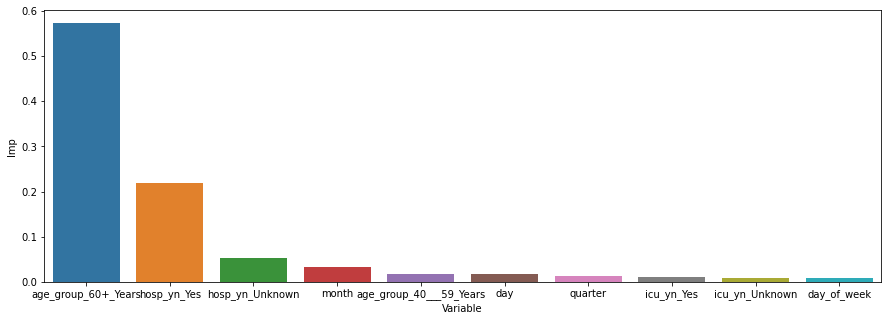

In [113]:
plt.figure(figsize=(15,5))
sns.barplot(data=feat_imp.head(10), x='Variable',y='Imp')

In [114]:
x_train1=x_train[['age_group_60+_Years', 'hosp_yn_Yes', 'hosp_yn_Unknown', 'month',
       'age_group_40___59_Years', 'day', 'quarter']]
x_test1=x_test[['age_group_60+_Years', 'hosp_yn_Yes', 'hosp_yn_Unknown', 'month',
       'age_group_40___59_Years', 'day', 'quarter']]

In [115]:
dt_f=DecisionTreeClassifier(criterion='entropy',max_depth=11, min_samples_leaf=15, min_samples_split=50)
dt_f.fit(x_train1,y_train)

print('Train Accuracy : '+str(round(dt_f.score(x_train1,y_train),3)*100)+str(' %'))
print('Test Accuracy : '+str(round(dt_f.score(x_test1,y_test),3)*100)+str(' %'))

Train Accuracy : 88.8 %
Test Accuracy : 88.6 %


In [116]:
pred_train=dt_f.predict(x_train1)
pred_test=dt_f.predict(x_test1)

In [117]:
prob_train_1=dt_f.predict_proba(x_train1)[:,1]
prob_test_1=dt_f.predict_proba(x_test1)[:,1]

In [118]:
def classification_eva(act,pred,probs):
    ac1=metrics.accuracy_score(act,pred)
    rc1=metrics.recall_score(act,pred)
    pc1=metrics.precision_score(act,pred)
    f1=metrics.f1_score(act,pred)
    auc1=metrics.roc_auc_score(act,pred)
    result={'Accuracy':ac1, 'Recall':rc1, 'Precision': pc1, 'F1 score': f1, 'AUC':auc1}
    
    fpr, tpr, thresholds=metrics.roc_curve(act,probs)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.show()
    return result

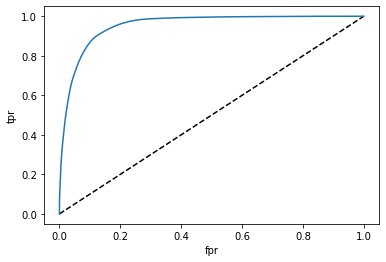

{'Accuracy': 0.8880441865516492,
 'Recall': 0.8845334469535577,
 'Precision': 0.8435595286468915,
 'F1 score': 0.8635607321131448,
 'AUC': 0.8874617437940913}

In [119]:
classification_eva(y_train,pred_train, probs=prob_train_1)

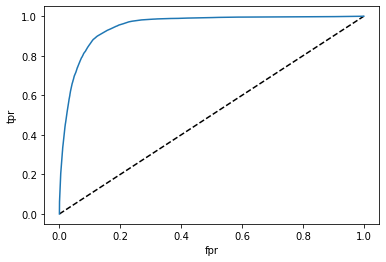

{'Accuracy': 0.88618386518725,
 'Recall': 0.879845850346378,
 'Precision': 0.8394099881822559,
 'F1 score': 0.8591524056984142,
 'AUC': 0.8850798758458347}

In [120]:
classification_eva(y_test,pred_test, probs=prob_test_1)

### Random Forest

In [121]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [122]:
print('Train Accuracy :',rf.score(x_train,y_train))
print('Test Accuracy :',rf.score(x_test,y_test))

Train Accuracy : 0.9348993080336364
Test Accuracy : 0.8849168280630623


In [123]:
import time
tic=time.time()

params={'n_estimators':[100,150,200],
         'criterion': ['gini','entropy'],
         'max_depth': [9,11,13,15],
         'min_samples_split': [50,100,200],
         'min_samples_leaf': [5,10,15,20],
         'max_features':['sqrt','log2'],
         'bootstrap':[True]
        }
rf1=RandomForestClassifier()
gs_rf=GridSearchCV(estimator=rf1, param_grid=params, cv=10, n_jobs=-1, verbose=1)
gs_rf.fit(x_train,y_train)

toc=time.time()
print('\n Total time taken :', toc-tic)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits

 Total time taken : 59858.954600811005


In [126]:
gs_rf.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 100}

In [127]:
gs_rf.best_score_

0.8951655460034031

In [128]:
gs_rf.best_estimator_

RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=50)

In [130]:
rff=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= 15, max_features= 'sqrt', 
                           min_samples_leaf= 5, min_samples_split= 50, bootstrap=True)
rff.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=50)

In [131]:
print('Train Accuracy :',rff.score(x_train,y_train))
print('Test Accuracy :',rff.score(x_test,y_test))

Train Accuracy : 0.8986331337077605
Test Accuracy : 0.8944739080855069


### Feature Importance

In [132]:
pd.DataFrame({'Var':x_train.columns,'Imp':rff.feature_importances_}).sort_values(by='Imp',ascending=False)

,Var,Imp
9,age_group_60+_Years,0.367095
19,hosp_yn_Yes,0.245948
7,age_group_20___39_Years,0.087452
1,month,0.060633
18,hosp_yn_Unknown,0.040012
8,age_group_40___59_Years,0.037881
21,icu_yn_Yes,0.033778
0,quarter,0.032645
23,medcond_yn_Yes,0.022296
2,day,0.012821


### Model Evolution

In [133]:
pred_train=rff.predict(x_train)
pred_test=rff.predict(x_test)

In [134]:
prob_train_1=rff.predict_proba(x_train)[:,1]
prob_test_1=rff.predict_proba(x_test)[:,1]

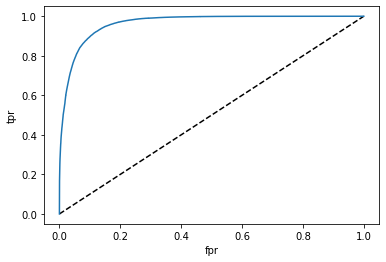

{'Accuracy': 0.8986331337077605,
 'Recall': 0.8909826858271681,
 'Precision': 0.860823681305316,
 'F1 score': 0.875643575663561,
 'AUC': 0.8973639003067564}

In [136]:
classification_eva(y_train,pred_train, probs=prob_train_1)

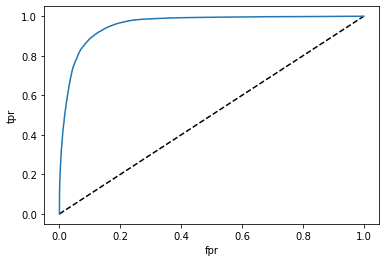

{'Accuracy': 0.8944739080855069,
 'Recall': 0.8846630270220672,
 'Precision': 0.8532678437098987,
 'F1 score': 0.8686818632309217,
 'AUC': 0.892764996321198}

In [137]:
classification_eva(y_test,pred_test, probs=prob_test_1)

#### From here we can conclude that the result given by the Random Forest is more stable